In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [2]:
path = '/users/mohammedshabo/downloads/gdp_raw.xlsx'

In [3]:
df = pd.read_excel(path)

In [4]:
y = df['GDP (current US$)']

In [5]:
y

0     1.307333e+09
1     1.419333e+09
2     1.541667e+09
3     1.568333e+09
4     1.611333e+09
          ...     
56    5.280407e+10
57    4.501718e+10
58    3.452259e+10
59    3.225045e+10
60    2.611083e+10
Name: GDP (current US$), Length: 61, dtype: float64

In [6]:
features = df

In [7]:
features.shape

(61, 1444)

In [8]:
features_droped_any =features.dropna(axis=1,how = 'any')

In [9]:
features_droped_any.shape

(61, 147)

In [10]:
features_droped_any.set_index('Unnamed: 0')

,GDP (current US$),Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current LCU)","Agriculture, forestry, and fishing, value added (current US$)",Broad money (% of GDP),Broad money (current LCU),"Claims on central government, etc. (% GDP)",...,"Population, female (% of total population)","Population, male","Population, male (% of total population)","Population, total",Rural population,Rural population (% of total population),Terms of trade adjustment (constant LCU),Trade (% of GDP),Urban population,Urban population (% of total population)
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1960 [YR1960],1.307333e+09,93.161154,6.249109,86.912045,51.427843,2.017000e+05,6.723333e+08,9.994901,3.920000e+04,-11.698113,...,50.053403,3768220,49.946597,7544498,6733766,89.254,6.989804e+07,27.562468,810732,10.746
1961 [YR1961],1.419333e+09,93.871960,6.238083,87.633876,51.503053,2.193000e+05,7.310000e+08,11.092062,4.723000e+04,-8.508690,...,50.049289,3880908,49.950711,7769475,6896808,88.768,9.932824e+07,27.665571,872667,11.232
1962 [YR1962],1.541667e+09,94.374069,6.203532,88.170537,49.881081,2.307000e+05,7.690000e+08,12.097297,5.595000e+04,-6.121081,...,50.044602,3998491,49.955398,8004122,7064678,88.263,6.733151e+07,29.664865,939444,11.737
1963 [YR1963],1.568333e+09,94.714755,6.152971,88.561784,44.845909,2.110000e+05,7.033333e+08,17.893730,8.419000e+04,0.450584,...,50.039424,4121157,49.960576,8248818,7237348,87.738,-4.867756e+07,34.750266,1011470,12.262
1964 [YR1964],1.611333e+09,94.934426,6.093726,88.840700,41.828713,2.022000e+05,6.740000e+08,14.635912,7.075000e+04,1.907323,...,50.033437,4249151,49.966563,8503989,7414798,87.192,9.893399e+07,33.471245,1089191,12.808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016 [YR2016],5.280407e+10,80.758721,6.307615,74.451106,29.940772,1.812640e+11,1.580995e+10,19.902158,1.204894e+11,10.609655,...,50.058941,19900230,49.941059,39847433,26251090,65.879,1.202585e+07,16.141083,13596343,34.121
2017 [YR2017],4.501718e+10,79.823223,6.357123,73.466100,24.127067,1.968420e+11,1.086133e+10,24.926907,2.033675e+11,10.715233,...,50.052025,20385466,49.947975,40813398,26785833,65.630,2.153590e+07,18.948246,14027565,34.370
2018 [YR2018],3.452259e+10,78.858731,6.405218,72.453513,21.960378,2.894310e+11,7.581291e+09,32.685590,4.307860e+11,10.294489,...,50.047415,20880946,49.952585,41801532,27320645,65.358,2.223503e+07,21.834996,14480887,34.642


In [11]:
features_droped_any = features_droped_any.rename(columns={'Unnamed: 0':'Year'})

In [12]:
def clean_year_column(dataframe, column_name):
    dataframe[column_name] = dataframe[column_name].str.replace(r'\s*\[YR\d+\]', '', regex=True)
    dataframe[column_name] = pd.to_numeric(dataframe[column_name], errors='coerce')
    return dataframe

features_droped_any = clean_year_column(features_droped_any,'Year')

In [62]:
features_droped_any.corr()

,Year,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current LCU)","Agriculture, forestry, and fishing, value added (current US$)",Broad money (% of GDP),Broad money (current LCU),"Claims on central government, etc. (% GDP)",...,"Population, female (% of total population)","Population, male","Population, male (% of total population)","Population, total",Rural population,Rural population (% of total population),Terms of trade adjustment (constant LCU),Trade (% of GDP),Urban population,Urban population (% of total population)
Year,1.000000,-0.856097,0.221473,-0.848401,-0.606788,0.526324,0.814818,0.242027,0.438199,0.118357,...,0.088576,0.989363,-0.088576,0.988964,0.989614,-0.960817,0.015281,-0.163477,0.984487,0.960817
Age dependency ratio (% of working-age population),-0.856097,1.000000,-0.528813,0.999633,0.397215,-0.642426,-0.712730,0.016366,-0.553749,0.221475,...,-0.358172,-0.915189,0.358172,-0.915604,-0.901954,0.786802,-0.111110,0.143668,-0.931986,-0.786802
"Age dependency ratio, old (% of working-age population)",0.221473,-0.528813,1.000000,-0.551615,-0.316768,0.657043,0.347305,0.229584,0.595158,-0.079886,...,0.868520,0.348997,-0.868520,0.352309,0.356371,0.015684,-0.035850,0.109099,0.345198,-0.015684
"Age dependency ratio, young (% of working-age population)",-0.848401,0.999633,-0.551615,1.000000,0.400476,-0.652320,-0.711523,0.008755,-0.563197,0.220205,...,-0.379721,-0.910545,0.379721,-0.911058,-0.897773,0.772730,-0.108049,0.137707,-0.926931,-0.772730
"Agriculture, forestry, and fishing, value added (% of GDP)",-0.606788,0.397215,-0.316768,0.400476,1.000000,-0.506376,-0.502969,-0.712354,-0.476193,-0.485384,...,-0.268511,-0.600511,0.268511,-0.601582,-0.624061,0.465799,0.265054,-0.140377,-0.567056,-0.465799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rural population (% of total population),-0.960817,0.786802,0.015684,0.772730,0.465799,-0.388253,-0.719380,-0.088811,-0.316410,-0.047110,...,0.128743,-0.925603,-0.128743,-0.924271,-0.917593,1.000000,-0.050968,0.240800,-0.930580,-1.000000
Terms of trade adjustment (constant LCU),0.015281,-0.111110,-0.035850,-0.108049,0.265054,0.091836,-0.105248,-0.191076,0.079437,-0.116584,...,-0.244884,0.026680,0.244884,0.025329,0.016010,-0.050968,1.000000,-0.234247,0.038659,0.050968
Trade (% of GDP),-0.163477,0.143668,0.109099,0.137707,-0.140377,-0.275816,-0.030972,-0.018419,-0.252782,-0.157395,...,0.226508,-0.141995,-0.226508,-0.141309,-0.134142,0.240800,-0.234247,1.000000,-0.151124,-0.240800
Urban population,0.984487,-0.931986,0.345198,-0.926931,-0.567056,0.592069,0.807971,0.171682,0.501268,0.014646,...,0.194726,0.997964,-0.194726,0.997887,0.993940,-0.930580,0.038659,-0.151124,1.000000,0.930580


In [13]:
correlations = features_droped_any.corr()

# Get the column names with the highest correlation (excluding the diagonal)
highest_corr_cols = correlations.abs().nlargest(10, 'GDP (current US$)')['GDP (current US$)'].index

# Select the subset of columns with the highest correlation
highest_corr_df = df[highest_corr_cols]

In [14]:
highest_corr_df.isnull().sum()

GDP (current US$)                                                    0
GNI (current US$)                                                    0
Gross value added at basic prices (GVA) (current US$)                0
Final consumption expenditure (current US$)                          0
Households and NPISHs Final consumption expenditure (current US$)    0
GDP per capita (current US$)                                         0
Agriculture, forestry, and fishing, value added (current US$)        0
Merchandise imports (current US$)                                    0
Imports of goods and services (current US$)                          0
Gross capital formation (constant 2010 US$)                          0
dtype: int64

In [15]:
features_droped_any = features_droped_any.drop('GDP (current US$)',axis = 1)

In [16]:
print(highest_corr_df['Final consumption expenditure (current US$)'].mean(),
highest_corr_df['Final consumption expenditure (current US$)'].std())

16178764317.273384 15971354557.351189


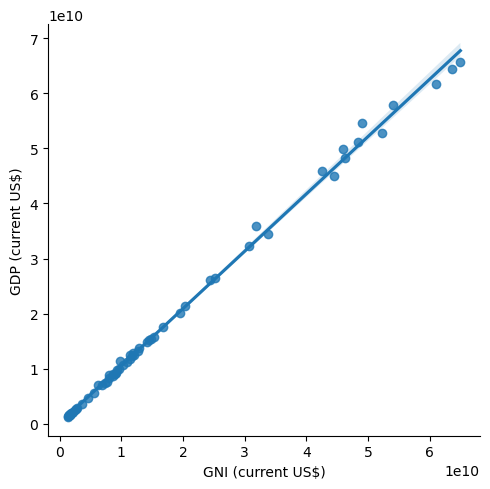

In [18]:
sns.lmplot(x='GNI (current US$)', y='GDP (current US$)', data=highest_corr_df)

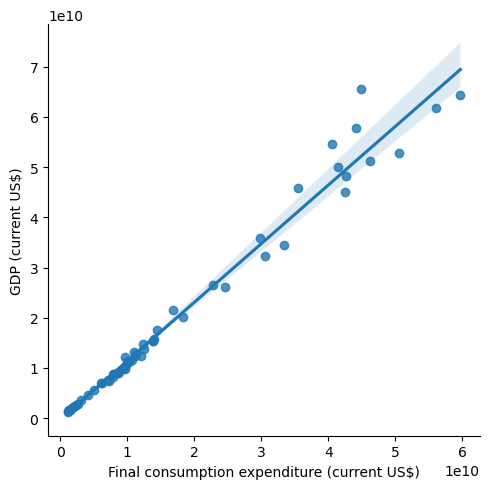

In [19]:
sns.lmplot(x='Final consumption expenditure (current US$)', y='GDP (current US$)', data=highest_corr_df)

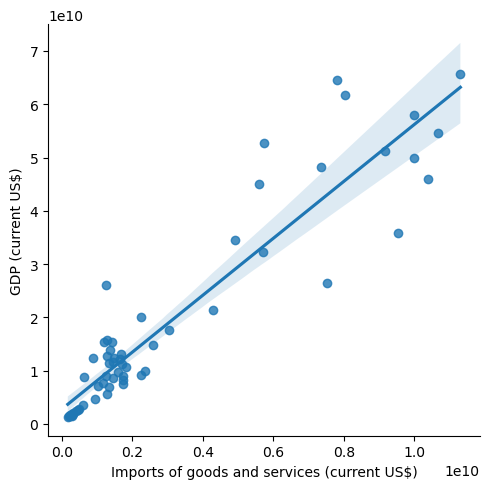

In [20]:
sns.lmplot(x='Imports of goods and services (current US$)', y='GDP (current US$)', data=highest_corr_df)

In [21]:
features_droped_any.isnull().sum()


Year                                                          0
Age dependency ratio (% of working-age population)            0
Age dependency ratio, old (% of working-age population)       0
Age dependency ratio, young (% of working-age population)     0
Agriculture, forestry, and fishing, value added (% of GDP)    0
                                                             ..
Rural population (% of total population)                      0
Terms of trade adjustment (constant LCU)                      0
Trade (% of GDP)                                              0
Urban population                                              0
Urban population (% of total population)                      0
Length: 146, dtype: int64

In [22]:
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [24]:
x_train , x_test ,y_train, y_test = train_test_split(features_droped_any, y , test_size=0.3)

In [51]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

In [57]:
l_model = LinearRegression()
R_model = Ridge(alpha = 0.1) 

In [58]:
l_model.fit(x_train,y_train)

LinearRegression()

In [59]:
R_model.fit(x_train_pr,y_train)

/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:195: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Ridge(alpha=0.1)

In [60]:
print('the training score for the training set of the Ridge model is: ', R_model.score(x_train_pr,y_train))
print('the test score for the testing set of the Ridge model is: ', R_model.score(x_test_pr,y_test))

the training score for the training set of the Ridge model is:  0.9999978640541635
the test score for the testing set of the Ridge model is:  0.7620460056750861


In [61]:
print('the training score for the training set is: ',l_model.score(x_train,y_train))
print('the test score for the testing set is: ',l_model.score(x_test,y_test))

the training score for the training set is:  1.0
the test score for the testing set is:  0.9999999987569936
